**Доброго времени суток! Меня зовут Айнур!**

В данном проекте я выстыпаю аналитиком для банка, в котором необходимо проанализировать причины оттока клиентов. 

**Цель** - Составить сегменты клиентов, которые ушли из банка.

Можно выделить следующие **задачи**:
- ознакомление с данными и предобработка;
- исследовательский анализ данных;
- проверка гипотез;
- составление сегментов;
- формирование рекомендаций.

Сами пункты включают в себя подпункты. В данном проекте представлен один датасет.

**P.S.** под строками кода я буду оставлять свои комментарии и делать небольшие выводы в таком формате: **<font color="green">Комментарий:<font>** 

In [1]:
pip install phik

     |████████████████████████████████| 686 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Знакомство с датасетом

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import plotly.express as px
import datetime as dt
import scipy.stats as stats
#import missingno as msno
import phik
from scipy import stats as st
from math import factorial, sqrt
from datetime import datetime, timedelta
from plotly import graph_objects as go
from folium import Map, Choropleth
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('max_colwidth', 130)

**<font color="green">Комментарий:<font>** Импортирование библиотек и установка настроек.

In [3]:
def preprocessing(file):
    print('Количество пропусков:')
    print(file.isna().sum())
    print('')
    print('Количество дубликатов:')
    print(file.duplicated().sum())
    print('')
    print('Доля дубликатов от общего числа записей:', round(file.duplicated().sum() / file.shape[0] * 100, 2), '%')

**<font color="green">Комментарий:<font>** Создание функции для визуального уменьшения кода. 

In [4]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets//datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0


**<font color="green">Комментарий:<font>** Чтение csv-файла и первое ознакомление.

In [5]:
data.columns = data.columns.str.lower()

**<font color="green">Комментарий:<font>** Приводим столбцы в нижний регистр.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**<font color="green">Комментарий:<font>** В датасете представлено **10 000** записей, **12** столбцов. В нём присутствуют пропуски в двух столбцах. Тип данных состоит из численных ( float64, int64 ) и типа данных object. 

In [7]:
data['churn'].value_counts()

0    8180
1    1820
Name: churn, dtype: int64

**<font color="green">Комментарий по первой части:<font>** Всего **10 000** записей с **12** столбцами. Есть **пропуски**. Основное разделение клиентов по столбцу `churn`, показывающий ушедший или не ушедший клиент. Стоит отметить, что в проекте не представлена информация о периоде исследования. На момент исследования из банка ушло **1820** клиентов(18.2%).

## Обработка данных

In [8]:
preprocessing(data)

Количество пропусков:
userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Количество дубликатов:
0

Доля дубликатов от общего числа записей: 0.0 %


**<font color="green">Комментарий:<font>** Пропуски в столбце `age` и `balance`. Явных дубликатов в датасете нет.

### Обработка пропусков

#### `age`

In [9]:
datapass = data.copy()
datapass['age'] = data['age'].isna()
datapass.query('age == True')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,True,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.00,Рыбинск,Ж,True,0,NaN,1,1,1,160368.82,0
2444,221156,913.00,Ярославль,М,True,0,NaN,1,1,1,135693.24,0
3091,138660,836.00,Ростов,Ж,True,5,294315.53,2,0,1,63310.22,1
4912,210674,834.00,Рыбинск,М,True,1,238330.52,2,0,1,93775.06,0
5470,218868,827.00,Рыбинск,Ж,True,4,448959.07,2,1,1,67835.95,0
5495,151662,884.00,Рыбинск,Ж,True,0,NaN,1,1,1,137500.77,0
7236,210135,908.00,Рыбинск,Ж,True,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.00,Рыбинск,Ж,True,0,NaN,1,1,0,159248.67,0
7345,184913,829.00,Ярославль,Ж,True,3,188648.77,2,0,1,75206.90,0


**<font color="green">Комментарий:<font>** Создадим отдельный датасет с пропусками в столбце `age`. На первый вгляд нет общих признаков, кроме как большого количества пропусков в `balance`. Но из-за малого количества данных нет необходимости связывать пропуски в двух столбцах, так как очень большой шанс ошибиться. 

#### `balance`

In [10]:
balance = data.copy()
balance['balance'] = data['balance'].isna()
balance = balance.query('balance == True')
balance

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30.00,0,True,1,1,1,107683.34,0
9,133130,906.00,Ярославль,Ж,67.00,0,True,1,0,1,238055.53,0
10,148929,927.00,Ростов,М,52.00,0,True,1,1,1,196820.07,0
11,172184,921.00,Ростов,М,41.00,0,True,1,1,1,217469.48,0
19,127034,922.00,Рыбинск,Ж,53.00,0,True,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.00,Ростов,М,38.00,0,True,1,0,0,171763.69,0
9984,125941,729.00,Ярославль,Ж,42.00,0,True,1,1,1,687538.70,0
9993,219924,884.00,Рыбинск,Ж,36.00,0,True,1,1,1,169844.88,0
9996,139170,894.00,Ярославль,М,46.00,0,True,1,1,0,196898.29,0


**<font color="green">Комментарий:<font>** Создадим отдельный датасет. Всего **2295** пропусков, более 22%. Такое удаление можем негативно сказаться на качестве дальнейших исследований. Основное предположение - связаны ли пропуски в столбце `balance` с ушедшими клиентами?

In [11]:
balance['churn'].value_counts()

0    2282
1      13
Name: churn, dtype: int64

**<font color="green">Комментарий:<font>** Нет, не связаны. Всего 13 ушедших клиентов. То есть 13 клиентов от 18.2% всех ушедших клиентов. 
    

Определим тип пропусков как **MNAR** (Missing Not At Random / Отсутствует не случайно)пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
    
    
С помощью дополнительной таблицы определим есть ли **зависимость** пропусков от данных.

In [12]:
data['flag_nan_balance'] = data['balance'].isnull()
data['flag_nan_balance'] = data['flag_nan_balance'].apply(lambda x: 1 if x == True else 0)

**<font color="green">Комментарий:<font>** Создадим признак для каждой записи. Если 1 значит отсутствует значение в столбце `balance`, если 0, то без пропусков.

In [13]:
z =  data[data['flag_nan_balance']==0]
k =  data[data['flag_nan_balance']==1]

In [14]:
portrait = [['Мода по городу', z['city'].agg(lambda x: x.mode()[0]),\
             k['city'].agg(lambda x: x.mode()[0]), '-'],
            
            ['Мода по гендеру', z['gender'].agg(lambda x: x.mode()[0]),\
             k['gender'].agg(lambda x: x.mode()[0]), '-'],
    
            ['Медианное значение зарплаты', z['est_salary'].median(), k['est_salary'].median(),\
             round(z['est_salary'].median() / k['est_salary'].median() * 100 - 100, 2)],
            
            ['Срелний возраст',  z['age'].mean(), k['age'].mean(),\
             round(z['age'].mean() / k['age'].mean() * 100 - 100, 2)],
            
            ['Средний скоринговый балл', z['score'].mean(), k['score'].mean(),\
             round(z['score'].mean() / k['score'].mean() * 100 - 100, 2)],
            
            ['Среднее количество недвижимости', z['equity'].mean(), k['equity'].mean(),\
             round(z['equity'].mean() / k['equity'].mean() * 100 - 100, 2)],
            
            ['Среднее количество продуктов', z['products'].mean(), k['products'].mean(),\
             round(z['products'].mean() / k['products'].mean() * 100 - 100, 2)],
            
            ['Среднее количество кредитных карт', z['credit_card'].mean(), k['credit_card'].mean(),\
             round(z['credit_card'].mean() / k['credit_card'].mean() * 100 - 100, 2)],
            
            ['Среднее значение активновсти клиентов', z['last_activity'].mean(), k['last_activity'].mean(),\
             round(z['last_activity'].mean() / k['last_activity'].mean() * 100 - 100, 2)]
            
           ]

columns = ['Признак', 'Значение не пропущено', 'Значение пропущено', 'Относительная разница в %']

pd.DataFrame(data=portrait, columns=columns)

,Признак,Значение не пропущено,Значение пропущено,Относительная разница в %
0,Мода по городу,Ярославль,Ярославль,-
1,Мода по гендеру,Ж,М,-
2,Медианное значение зарплаты,106222.20,174160.68,-39.01
3,Срелний возраст,42.92,42.09,1.98
4,Средний скоринговый балл,843.74,865.35,-2.50
5,Среднее количество недвижимости,3.40,0.05,6559.56
6,Среднее количество продуктов,2.08,1.16,79.07
7,Среднее количество кредитных карт,0.64,0.82,-21.53
8,Среднее значение активновсти клиентов,0.52,0.55,-6.13


**<font color="green">Комментарий:<font>** Мы видим, что пропуски в столбце `balance` связаны с количеством недвижимости. Заполнение или удаление этих данных может привести к заметному искажению данных.
    
    
В ходе дальнейшего исследования данные с пропусками **не будут удаляться**.

### Неявные дубликаты

In [15]:
data['userid'].value_counts()

227795    2
198635    2
210898    2
210627    2
202983    2
         ..
146877    1
214466    1
226756    1
173510    1
215039    1
Name: userid, Length: 9927, dtype: int64

**<font color="green">Комментарий:<font>** В датасете представлено 73 * 2 = **146** записи с одинаковыми значениями в столбце `userid`. 

Рассмотрим несколько значений:

In [16]:
print(data['userid'].value_counts().head(50))

227795    2
198635    2
210898    2
210627    2
202983    2
226550    2
155872    2
188957    2
120258    2
171751    2
210662    2
170312    2
141265    2
129785    2
140934    2
219343    2
211130    2
181526    2
217643    2
160075    2
206759    2
148826    2
187635    2
163657    2
228075    2
220816    2
143592    2
210792    2
175730    2
127440    2
208815    2
163207    2
149365    2
117943    2
152479    2
208738    2
126368    2
210135    2
208081    2
183510    2
221156    2
217619    2
226719    2
197364    2
217826    2
131419    2
222480    2
185748    2
221197    2
140377    2
Name: userid, dtype: int64


In [17]:
data.query('userid == 227795')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
8205,227795,840.00,Рыбинск,М,34.00,2,350768.03,1,1,0,102036.14,1,0
8497,227795,839.00,Ярославль,М,34.00,2,326593.14,2,1,0,103314.92,0,0


**<font color="green">Комментарий:<font>** Скорее всего здесь представлен один человек, который мог переехать из Рыбинска в Ярославль. Можно предположить, что для таких клиентов создается отдельная запись. 

In [18]:
data.query('userid == 116540')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0,1


**<font color="green">Комментарий:<font>** Здесь почти похожая ситуация, но очень большая разница в возрасте. Из-за того, что мы не имеем информации о периоде исследования трудно определить один это человек или два разных.

In [19]:
data.query('userid == 124450')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
8164,124450,859.00,Ярославль,Ж,38.00,6,516811.20,1,1,1,95144.63,1,0
9775,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0,0


**<font color="green">Комментарий:<font>** Стоит предположить, что здесь два разных человека из-за разницы в возрасте. Ведь у того кто ушёл возраст больше.

In [20]:
data.query('userid == 210627')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
7453,210627,864.00,Ярославль,Ж,38.00,4,1527225.32,4,1,1,162999.17,1,0
8521,210627,804.00,Рыбинск,М,30.00,2,347818.88,3,1,0,129015.25,0,0


**<font color="green">Комментарий:<font>** Скорее всего два разных человека.

In [21]:
data.query('userid == 140377')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
1608,140377,802.00,Ярославль,М,26.00,3,539863.29,4,1,1,112167.83,1,0
7487,140377,930.00,Рыбинск,Ж,34.00,5,1123967.02,1,1,1,148336.26,0,0


**<font color="green">Комментарий:<font>** Разные ли это люди...?

In [22]:
data.query('userid == 163657')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
6670,163657,903.00,Рыбинск,М,45.00,4,1343339.70,4,0,1,83741.65,0,0
9667,163657,849.00,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0,0


**<font color="green">Комментарий:<font>** Первый случай где у нас одинаковая ситуация в столбце `churn`. Если до этого у нас была общая тенденция, что клиенты с одинаковыми `userid` имели в одной записи статус ушедшего, а в другой нет, то сейчас оба записи с данным `userid` имеют статус неушедшего.

In [23]:
data.query('userid == 208815')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
3350,208815,877.00,Рыбинск,М,25.00,4,239421.18,1,1,1,48638.00,1,0
5570,208815,773.00,Ярославль,М,39.00,4,288110.09,2,1,0,56971.91,0,0


**<font color="green">Комментарий:<font>** Ситуация где у нас опять большая разница в возрасте. Стоит отметить, что все записи имеют тенденцию разных городов.

In [24]:
data.query('userid == 211130')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
1359,211130,833.00,Ярославль,М,55.00,3,1231184.90,4,0,1,187758.38,1,0
3817,211130,918.00,Рыбинск,Ж,55.00,0,NaN,2,1,1,244202.04,0,1


**<font color="green">Комментарий:<font>** А это запись относится к одному к одному человеку, который переехал из Ярославля в Рыбинск.

**<font color="green">Комментарий:<font>** Без дополнительной информации трудно определить из-за чего неявные дубликаты появились. Можно предположить, что в некоторых случаях это один и тот же человек, а в других - разные люди. Будем работать дальше с этими данными.

### Распределение и проверка на аномальные значения

In [25]:
data[['score', 'age', 'balance', 'est_salary']].describe()

,score,age,balance,est_salary
count,10000.00,9974.00,7705.00,10000.00
mean,848.70,42.73,827794.31,147866.89
std,65.45,12.18,1980614.15,139388.51
min,642.00,18.00,0.00,2546.30
25%,802.00,33.00,295554.16,75251.90
50%,853.00,40.00,524272.20,119658.10
75%,900.00,51.00,980705.85,174500.54
max,1000.00,86.00,119113552.01,1395064.45


**<font color="green">Комментарий:<font>** 
 
1. Столбец `score` описывает распределение кредитного скоринга. Минимальное значение - **642**, а максимальное - **1000** (как и должно быть). Мы наблюдаем, что большинство клиентов имеют скоринг выше 750 баллов. Здесь аномалий не наблюдается. 
    
    
2. Мы видим, что в данных нет клиентов < **18** лет. Максимальный возраст - **86** лет.
                                               
                                               
3. В столбце `balance` достаточно большой разброс, для дальнейшей работы следует использовать медиану. 
                                               
                                               
4. Аналогичная ситуация и для столбца с зарплатой.

#### `city`

In [26]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

**<font color="green">Комментарий:<font>** Всего в исследовании представлено три города.

In [27]:
data['city'].value_counts().reset_index()

,index,city
0,Ярославль,5888
1,Рыбинск,2695
2,Ростов,1417


**<font color="green">Комментарий:<font>** Больше половины клиентов из **Ярославля**, около 6000 записей, на втором месте **Рыбинск**, 2695 записей, после идёт **Ростов** с 1417 клиентами.

#### `gender`

In [28]:
data['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

**<font color="green">Комментарий:<font>** Практически равное распределение по полу. Мужчин чуть больше.

#### `age`

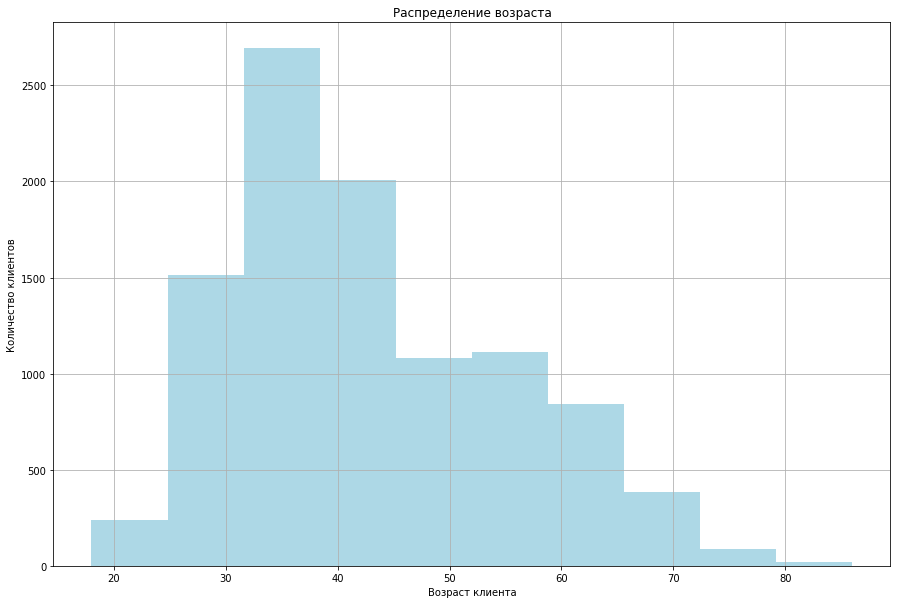

In [29]:
data['age'].plot(kind='hist', bins=10, title='Распределение возраста',\
figsize=(15, 10), grid=True, color = "lightblue");
plt.xlabel('Возраст клиента');
plt.ylabel('Количество клиентов');

**<font color="green">Комментарий:<font>** Большое количество клиентов от 30 до 45 лет.

#### `equity`

In [30]:
data['equity'].value_counts()

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

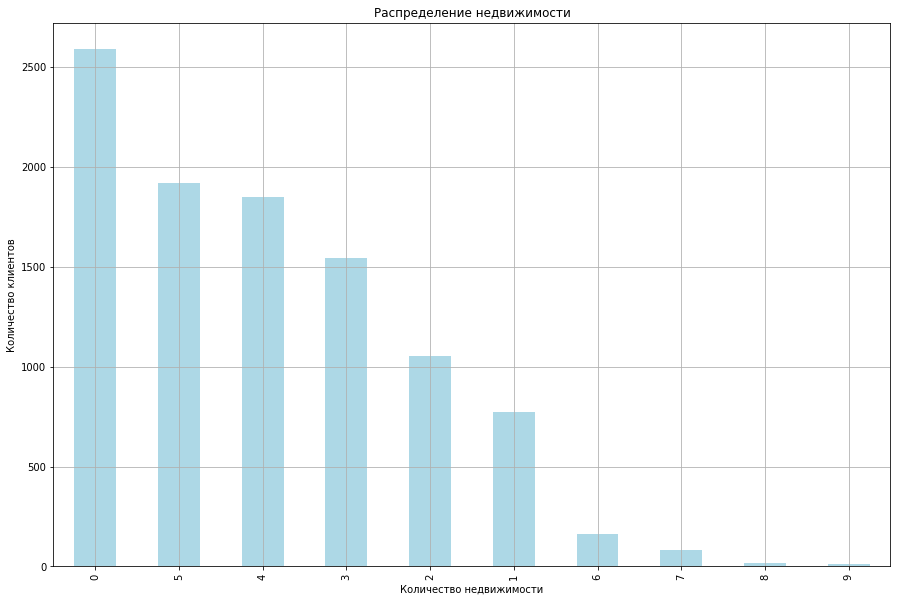

In [31]:
data['equity'].value_counts().plot(kind='bar', title='Распределение недвижимости',\
figsize=(15, 10), grid=True, color = "lightblue", xlabel='Количество недвижимости', ylabel='Количество клиентов');

**<font color="green">Комментарий:<font>** Четверть клиентов не имеют недвижимости. Более 4 500 клиентов, у которых значения от 3 до 5 включительно. 

#### `products`

In [32]:
data['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

**<font color="green">Комментарий:<font>** Есть аномальное значение, где количество продуктов банка равно нулю. Проверим:

In [33]:
data.query('products == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1,1


**<font color="green">Комментарий:<font>** Ушедший клиент, с пропуском в столбце баланса. Данный случай ухода можно обосновать возрастом клиента. Удалим запись:

In [34]:
data = data.query('userid != 147837')

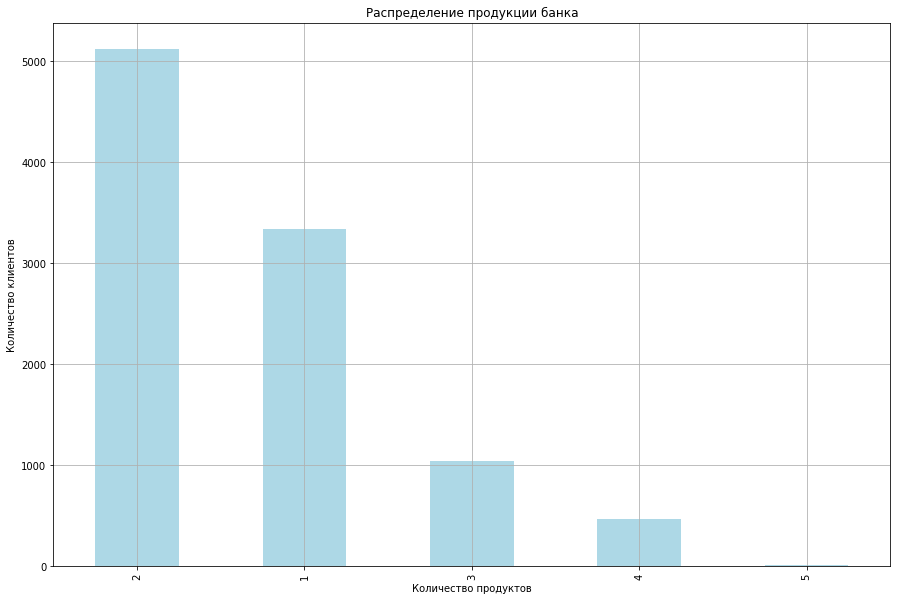

In [35]:
data['products'].value_counts().plot(kind='bar', title='Распределение продукции банка',\
figsize=(15, 10), grid=True, color = "lightblue", xlabel='Количество продуктов', ylabel='Количество клиентов');

**<font color="green">Комментарий:<font>** Построим распределение. Чаще всего две позиции. Можно предположить, что это банковская карта и кредитная карта банка, а так же накопительный счёт или иной способ накопления средств.

#### `credit_card`

In [36]:
data['credit_card'].value_counts().reset_index()

,index,credit_card
0,1,6804
1,0,3195


**<font color="green">Комментарий:<font>** Кредитная карта есть у **68%** клиентов банка.

#### `last_activity`

In [37]:
data['last_activity'].value_counts().reset_index()

,index,last_activity
0,1,5235
1,0,4764


**<font color="green">Комментарий:<font>** Больше половины клиентов активные. Однако без дополнительной информации сложно предположить, что значит активный и неактивный? За какой период?

#### `est_salary`

In [38]:
data['est_salary'].describe()

count      9999.00
mean     147879.17
std      139390.07
min        2546.30
25%       75252.12
50%      119661.51
75%      174501.12
max     1395064.45
Name: est_salary, dtype: float64

In [39]:
data.query('est_salary < 10000')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag_nan_balance
505,205035,725.00,Рыбинск,Ж,77.00,3,73.00,2,0,1,8729.84,0,0
1700,155567,747.00,Ростов,М,25.00,0,5750.92,1,1,0,7054.82,0,0
1753,161271,836.00,Ярославль,Ж,19.00,4,7703.05,4,1,1,5043.14,0,0
1883,151268,852.00,Ростов,Ж,63.00,5,373070.37,1,1,1,8587.79,0,0
1988,160979,788.00,Рыбинск,М,24.00,4,118438.82,2,1,0,8401.97,0,0
2174,143340,830.00,Ярославль,Ж,72.00,2,294375.63,3,1,1,8032.18,0,0
2186,201407,938.00,Рыбинск,Ж,69.00,1,325483.52,3,0,1,3487.33,0,0
2663,140105,821.00,Ростов,Ж,75.00,7,631805.72,1,1,0,8894.57,0,0
3606,187819,839.00,Рыбинск,Ж,56.00,5,1027438.02,2,0,0,7571.80,0,0
3689,219561,817.00,Ростов,М,25.00,3,121065.39,4,1,1,7522.14,0,0


**<font color="green">Комментарий:<font>** Рассмотрим подробнее:
    
1. Зарплаты больше 10 000 можно обосновать различными способами(неполный график, подработка и т.д.)
    
    
2. Клиентов, у которых зарплата меньше 10 000 рублей в основном люди пенсионного возраста. Ни один клиент не считается ушедшим. У каждого есть определенный баланс и продукция банка.
    
 
3. К тому же не только заработная плата может быть источником дохода у клиента.
    
    
Продолжим работу с данными.

**<font color="green">Комментарий по второй части:<font>** 
    
1. Есть пропуски в двух столбцах, решение - работать с данными дальше;
    

2. Классификация пропусков - MNAR. Пропуски в столбце баланса связаны с количеством недвижимости.
    
    
3. Есть неявные дубликаты. Без дополнительной информации сложно определить их характер возникновения;
    
    
4. Представлено три города (Ярославль, Рыбинск, Ростов);
    
    
5. Медианное значение возраста - 40 лет;
    
    
6. Наиболее частый интервал недвижимости от 3 до 5;
    
    
7. Медианное значение баланса - более 500 000 рублей;
    
    
8. У более половины клиентов есть кредитная карта;
    
    
9. В столбце зарплаты указана не только з/п, но и пенсия у некоторых клиентов.

## EDA

### Анализ признаков

**<font color="green">Комментарий:<font>** Рассмотрим значения без визуализации:

In [40]:
data[['score', 'age', 'churn', 'balance', 'est_salary']].groupby('churn').agg('median')

,score,age,balance,est_salary
churn,,,,
0,848.00,40.00,475382.45,118257.71
1,866.00,39.00,782410.47,125395.22


**<font color="green">Комментарий:<font>** Мы можем наблюдать, что есть большая разница в медианном значении баланса у ушедших и оставшихся клиентов, остальные параметры схожи.

In [41]:
data[['equity', 'churn', 'products', 'credit_card', 'last_activity']].groupby('churn').agg('mean')

,equity,products,credit_card,last_activity
churn,,,,
0,2.37,1.76,0.71,0.48
1,3.76,2.38,0.55,0.70


**<font color="green">Комментарий:<font>** Клиенты, у которых в среднем больше недвижимости и продукции банка склонны к уходу.

#### Скоринг

In [42]:
def numericgraphs (sign, bins, title, xlabel):
    fig, ax = plt.subplots(figsize = (15, 10))
    sns.histplot(data=data, x=sign, bins=bins, \
    hue='churn', stat="density", common_norm=False, kde=True)
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Количество пользователей');

In [43]:
def notnumericgraphs (sign,title, xlabel):
    fig, ax = plt.subplots(figsize = (15, 10))
    sns.barplot(data=data, x=sign, y='churn')
    plt.axhline(data['churn'].mean())
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Количество пользователей');

**<font color="green">Комментарий:<font>** Создадим функции для визуального уменьшения кода.

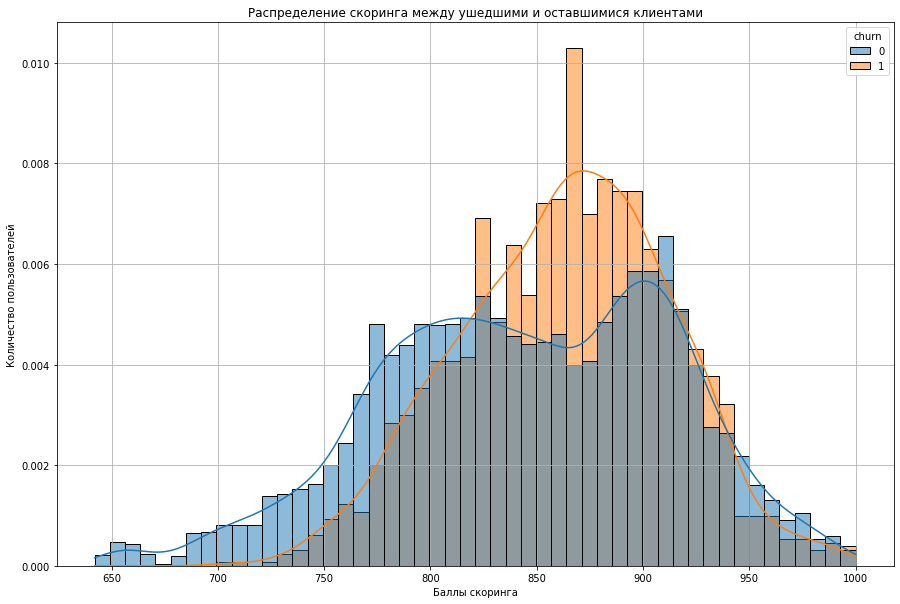

In [44]:
numericgraphs('score', 50, 'Распределение скоринга между ушедшими и оставшимися клиентами', 'Баллы скоринга')

**<font color="green">Комментарий:<font>** Мы наблюдаем, что в интервале от **820** до **900** баллов скоринга ушедших клиентов больше.

#### Возраст

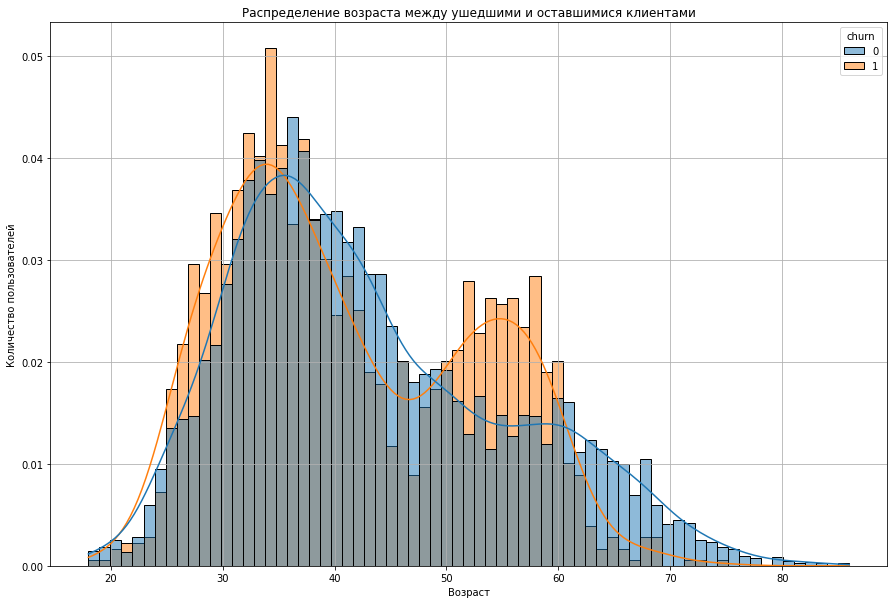

In [45]:
variablebins = int(data['age'].max() - data['age'].min() + 1)
numericgraphs('age', variablebins, 'Распределение возраста между ушедшими и оставшимися клиентами', 'Возраст')

**<font color="green">Комментарий:<font>** В диапазоне с 25 до 35 можно сказать, что отточных клиентов больше, но это небольшая разница. А вот начиная с **50 до 60** начинается сильная наблюдаемая разница.

#### Баланс

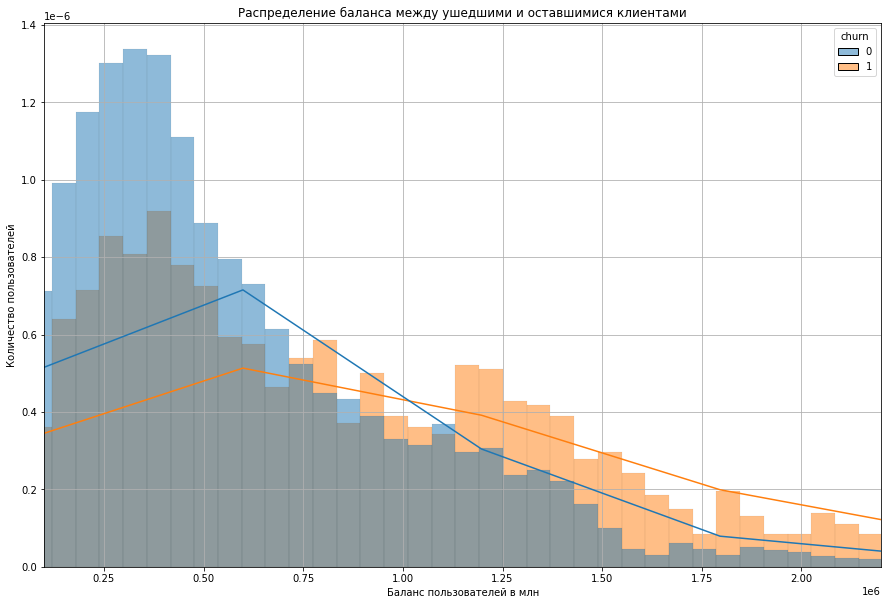

In [46]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.histplot(data=data, x='balance', bins=2000, \
hue='churn', stat="density", common_norm=False, kde=True)
plt.grid(True)
plt.title('Распределение баланса между ушедшими и оставшимися клиентами')
plt.xlim([100000, 2200000])
plt.xlabel('Баланс пользователей в млн')
plt.ylabel('Количество пользователей');

**<font color="green">Комментарий:<font>** До значения **700 000** отточных клиентов намного меньше, после начинается прирост. Со значения **750 000** ушедших клиентов намного больше. Более состоятельные клиенты склонны к оттоку?

#### Заработная плата

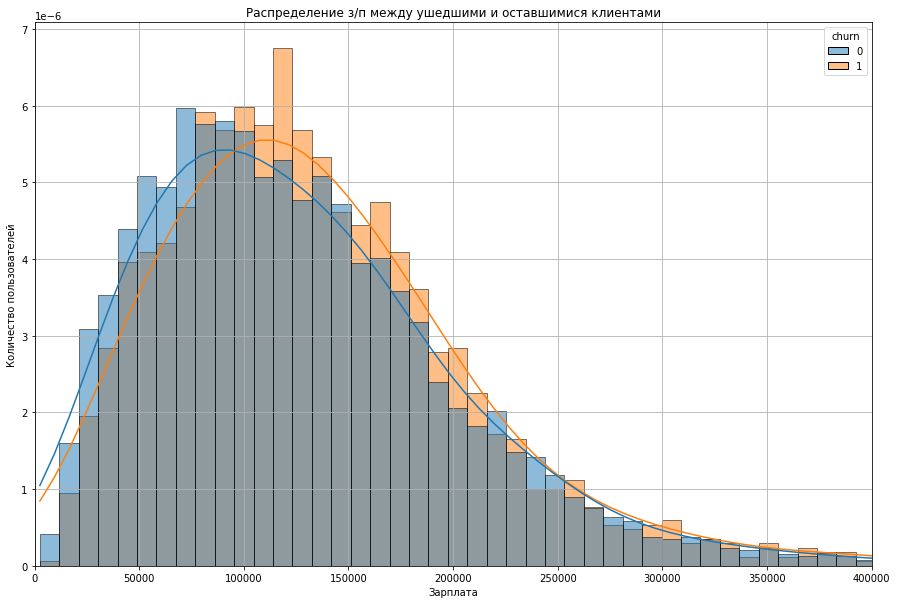

In [47]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.histplot(data=data, x='est_salary', bins=150, \
hue='churn', stat="density", common_norm=False, kde=True)
plt.grid(True)
plt.title('Распределение з/п между ушедшими и оставшимися клиентами')
plt.xlim([0, 400000])
plt.xlabel('Зарплата')
plt.ylabel('Количество пользователей');

**<font color="green">Комментарий:<font>** Здесь распределения практически идентичны. В интервале от **100 000** до **200 000** больше доля отточных клиентов.

#### Анализ по городам

**<font color="green">Комментарий:<font>** Средний уровень оттока, используемый для определения отточности исследуемых признаков.

In [48]:
data['churn'].mean()

0.18191819181918192

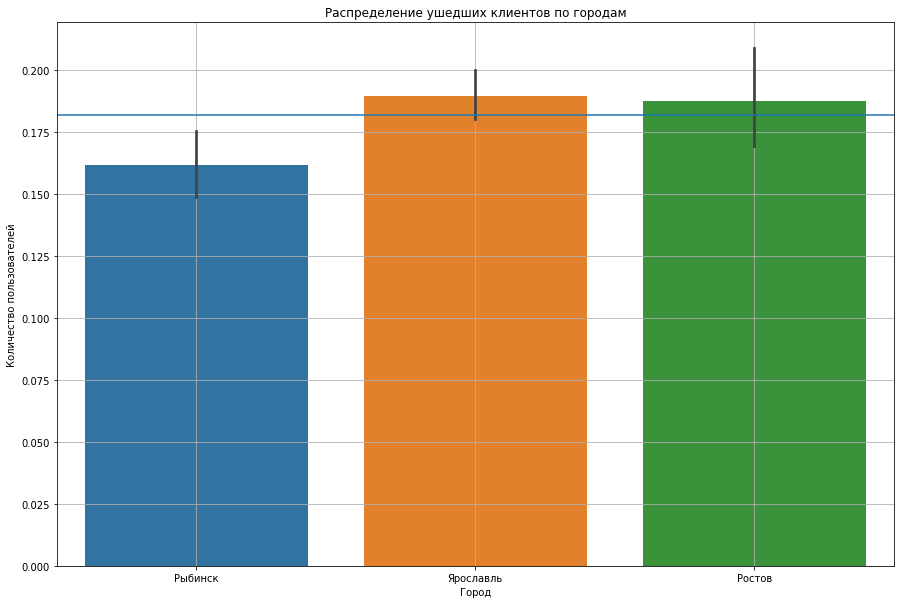

In [49]:
notnumericgraphs('city', 'Распределение ушедших клиентов по городам', 'Город')

**<font color="green">Комментарий:<font>** Показатели в **Ярославле** и **Ростове** чуть выше, чем средний показатель отточности, но не существенно.

#### Гендер

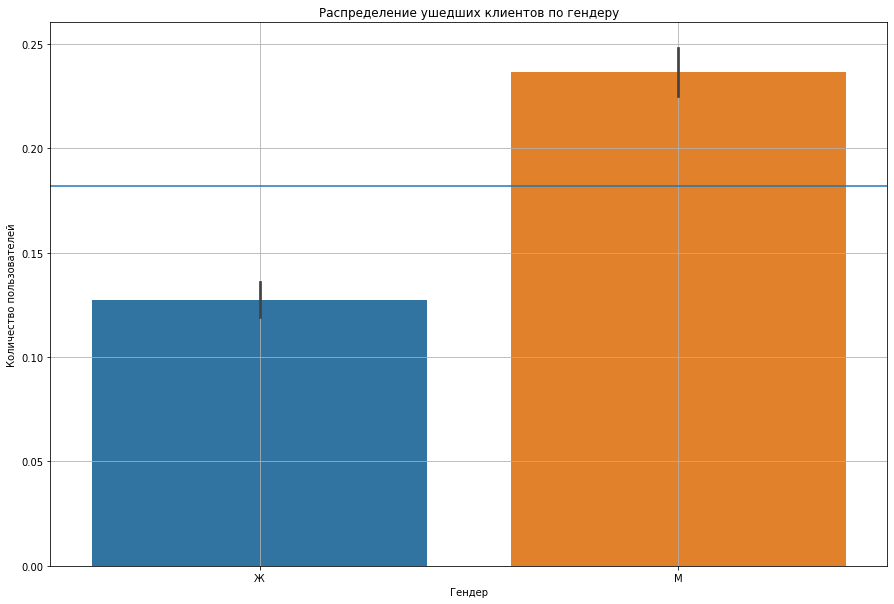

In [50]:
notnumericgraphs('gender', 'Распределение ушедших клиентов по гендеру', 'Гендер')

**<font color="green">Комментарий:<font>** Мужчины намного чаще уходят из банка.

#### Количество недвижимости

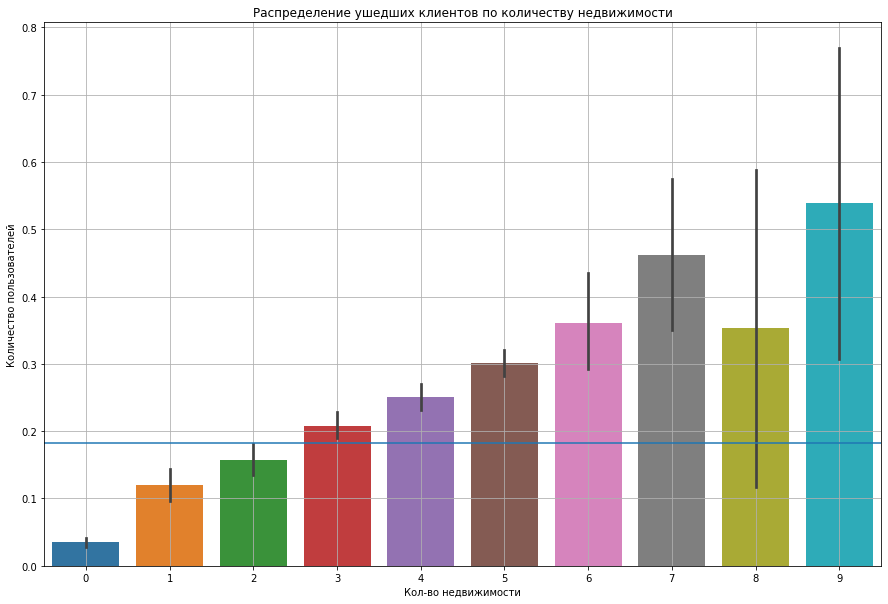

In [51]:
notnumericgraphs('equity', 'Распределение ушедших клиентов по количеству недвижимости', 'Кол-во недвижимости')

**<font color="green">Комментарий:<font>** Мы наблюдаем, что клиенты, у которых более 2 объектов недвижимости склонны к уходу.

#### Продукция банка

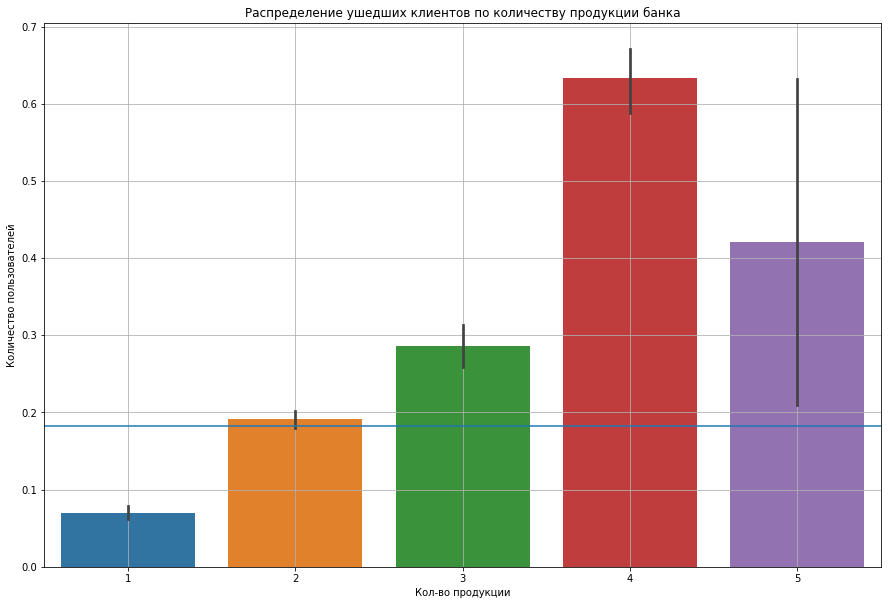

In [52]:
notnumericgraphs('products', 'Распределение ушедших клиентов по количеству продукции банка', 'Кол-во продукции')

**<font color="green">Комментарий:<font>** Клиенты, у которых значение количества продукции больше двух рискуют перестать пользоваться услугами банка.

#### Кредитная карта

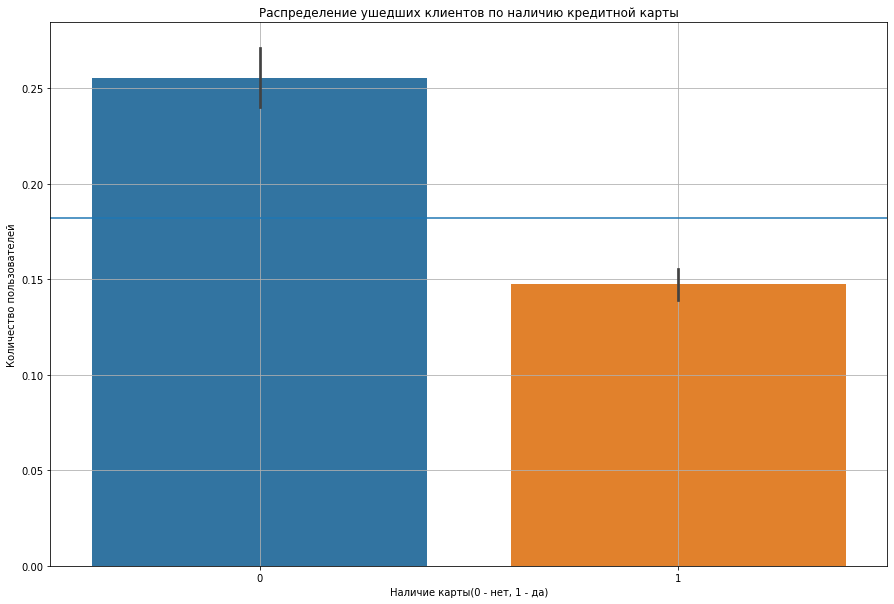

In [53]:
notnumericgraphs('credit_card', 'Распределение ушедших клиентов по наличию кредитной карты', 'Наличие карты(0 - нет, 1 - да)')

**<font color="green">Комментарий:<font>** Среди клиентов, у которых нет кредитной карты - отточность выше.

#### Активность клиента

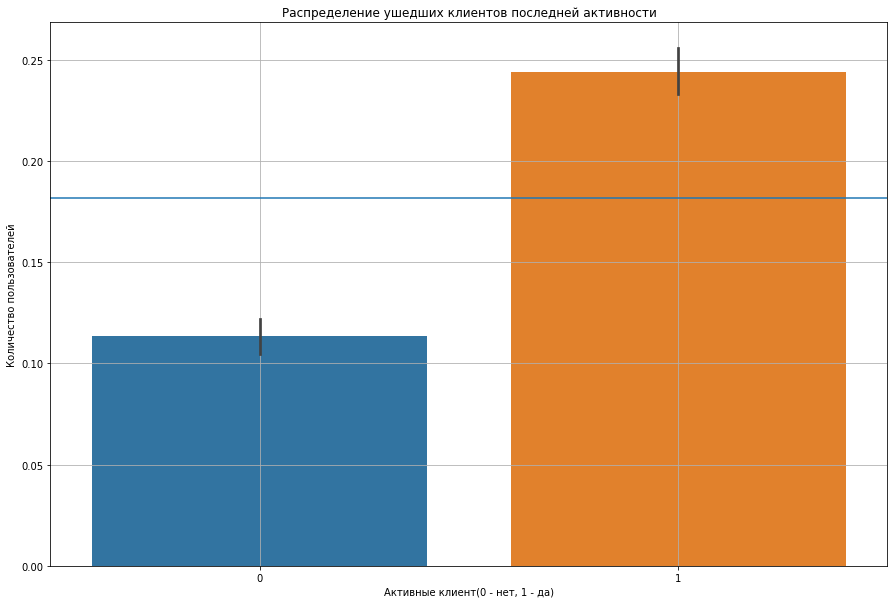

In [54]:
notnumericgraphs('last_activity', 'Распределение ушедших клиентов последней активности', 'Активные клиент(0 - нет, 1 - да)')

**<font color="green">Комментарий:<font>** Активные клиенты уходили намного чаще.

### Корреляция

In [55]:
dataforphik = data.copy()
dataforphik = dataforphik.drop('userid', axis=1)

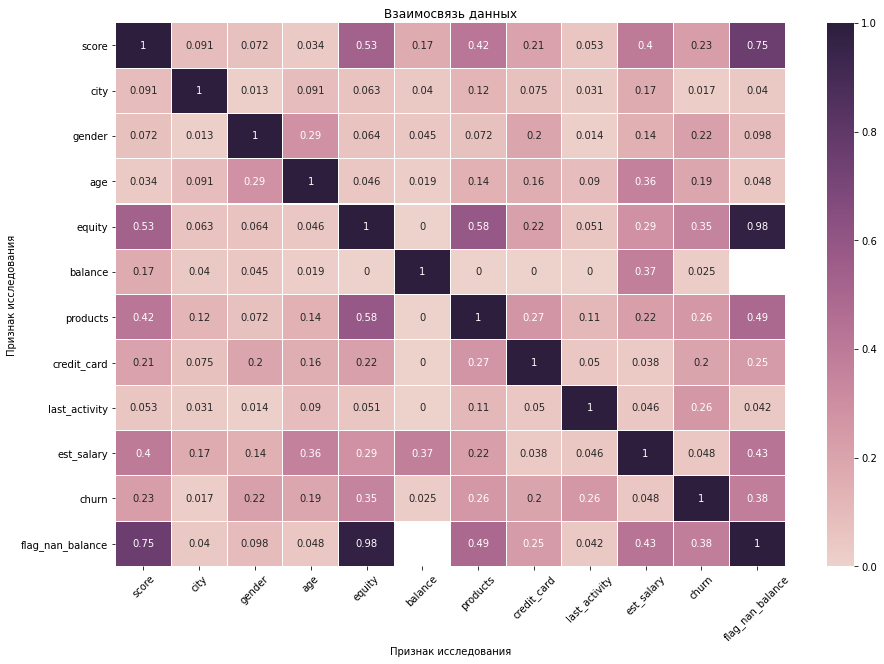

In [56]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.title('Взаимосвязь данных')

ax = sns.heatmap(dataforphik.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary']),\
vmin=0, vmax=1, annot=True, linewidth=.10, cmap=sns.cubehelix_palette(as_cmap=True))

ax.set(xlabel="Признак исследования", ylabel="Признак исследования")

plt.xticks(rotation=45);

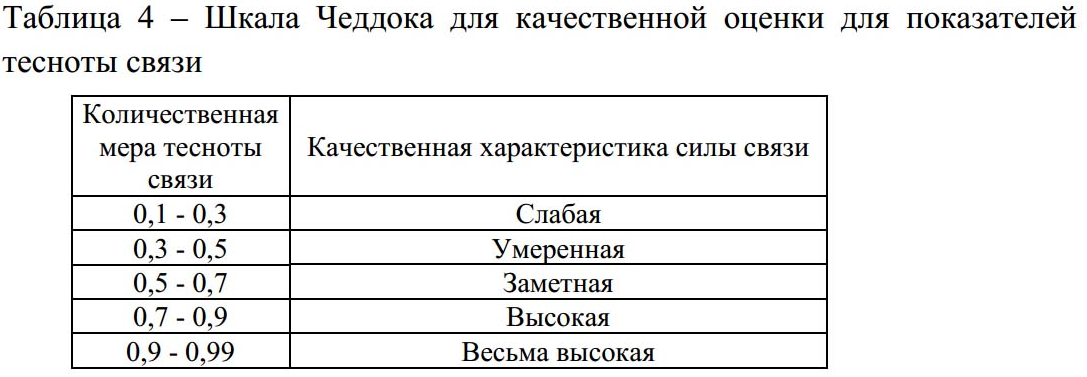

**<font color="green">Комментарий:<font>** Будем опираться на шкалу Чеддока:
    
Нас в первую очередь интересует отточность клиентов. Умеренная теснота связи присутсвует между столбцами `churn`  и `equity`,
    
`churn` и `est_salary`
    
    
Также практически максимальное значение тесноты для пропущенных значений и количества недвижимости.
    
    
Сильно влияющих на отток признаков на тепловой карте **не наблюдается**.

### Портрет клиента

In [57]:
x =  data[data['churn']==0]
y =  data[data['churn']==1]

In [58]:
portrait = [['Мода по городу', x['city'].agg(lambda x: x.mode()[0]),\
             y['city'].agg(lambda x: x.mode()[0]), '-'],
            
            ['Мода по гендеру', x['gender'].agg(lambda x: x.mode()[0]),\
             y['gender'].agg(lambda x: x.mode()[0]), '-'],
    
             ['Медианное значение баланса', x['balance'].median(), y['balance'].median(),\
             round(x['balance'].median() / y['balance'].median() * 100 - 100, 2)],
            
            ['Медианное значение зарплаты', x['est_salary'].median(), y['est_salary'].median(),\
             round(x['est_salary'].median() / y['est_salary'].median() * 100 - 100, 2)],
            
            ['Срелний возраст',  x['age'].mean(), y['age'].mean(),\
             round(x['age'].mean() / y['age'].mean() * 100 - 100, 2)],
            
            ['Средний скоринговый балл', x['score'].mean(), y['score'].mean(),\
             round(x['score'].mean() / y['score'].mean() * 100 - 100, 2)],
            
            ['Среднее количество недвижимости', x['equity'].mean(), y['equity'].mean(),\
             round(x['equity'].mean() / y['equity'].mean() * 100 - 100, 2)],
            
            ['Среднее количество продуктов', x['products'].mean(), y['products'].mean(),\
             round(x['products'].mean() / y['products'].mean() * 100 - 100, 2)],
            
            ['Среднее количество кредитных карт', x['credit_card'].mean(), y['credit_card'].mean(),\
             round(x['credit_card'].mean() / y['credit_card'].mean() * 100 - 100, 2)],
            
            ['Среднее значение активновсти клиентов', x['last_activity'].mean(), y['last_activity'].mean(),\
             round(x['last_activity'].mean() / y['last_activity'].mean() * 100 - 100, 2)]
            
           ]

columns = ['Признак', 'Оставшиеся клиенты', 'Отточные клиенты', 'Относительная разница в %']

pd.DataFrame(data=portrait, columns=columns)

,Признак,Оставшиеся клиенты,Отточные клиенты,Относительная разница в %
0,Мода по городу,Ярославль,Ярославль,-
1,Мода по гендеру,Ж,М,-
2,Медианное значение баланса,475382.45,782410.47,-39.24
3,Медианное значение зарплаты,118257.71,125395.22,-5.69
4,Срелний возраст,43.02,41.43,3.84
5,Средний скоринговый балл,845.43,863.35,-2.08
6,Среднее количество недвижимости,2.37,3.76,-36.91
7,Среднее количество продуктов,1.76,2.38,-26.06
8,Среднее количество кредитных карт,0.71,0.55,28.61
9,Среднее значение активновсти клиентов,0.48,0.70,-31.15


**<font color="green">Комментарий:<font>** Средний портрет "уходящего" клиента:
    
**Мужчина** из Ярославля, 41 год, с количеством недвижимости более **2**, у которого более **780 000** средств на балансе.

**<font color="green">Комментарий к EDA:<font>** Признаки на которые в первую очередь стоит обратить внимание после получения результатов исследовательского анализа данных:
    
- Количество недвижимости;
    
  
- З/п;
    
    
- Баланс.
    
Более подробные выводы будут в главе промежуточных выводов.

## Проверка гипотез

### Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформируем нулевую и альтернативную гипотезы:


**H0** -  доходы отточных и оставшихся клиентов равны


**H1** -  доходы отточных и оставшихся клиентов не равны

**<font color="green">Комментарий:<font>** Возвращаясь к пункту 3.1.4 мы можем увидеть, что оба признака не распределены нормально. Используем двухсторонний U-тест с уровенем стат. значимости равным 0.5.
    

Создадим отдельные датасеты:

In [59]:
churn_1 = data.query('churn == 1')
churn_0 = data.query('churn == 0')

In [60]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(churn_1['est_salary'], churn_0['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу: разница статистически значима


**<font color="green">Комментарий:<font>** Из полученных результатов мы отвергаем нулевую гипотезу о равенстве доходов. Будем считать, что доход влияет на отточность.

### Гипотеза различия баланаса между теми клиентами, которые ушли и теми, которые остались.

Сформируем нулевую и альтернативную гипотезы:


**H0** -  баланс отточных и оставшихся клиентов равны


**H1** -  баланс отточных и оставшихся клиентов не равны

**<font color="green">Комментарий:<font>** Проверим на нормальность с помощью графика:

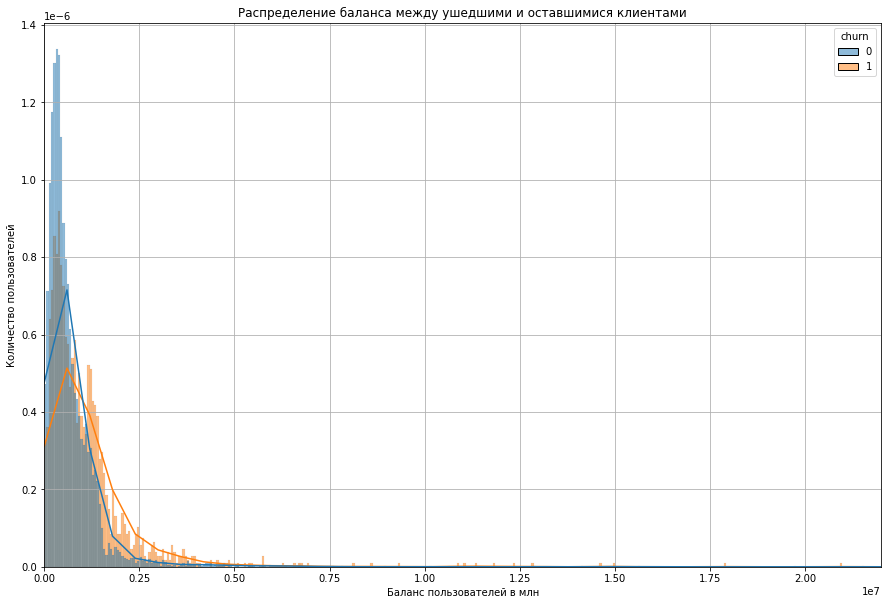

In [61]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.histplot(data=data, x='balance', bins=2000, \
hue='churn', stat="density", common_norm=False, kde=True)
plt.grid(True)
plt.title('Распределение баланса между ушедшими и оставшимися клиентами')
plt.xlim([0, 22000000])
plt.xlabel('Баланс пользователей в млн')
plt.ylabel('Количество пользователей');

**<font color="green">Комментарий:<font>** Мы видим, что данные имеют похожий признак на нормальность, но учитывая большие выбросы стоит применить U-тест.

In [62]:
churnforutest1 = data.query('churn == 1')
churnforutest1 = churnforutest1.dropna()
churnforutest2 = data.query('churn == 0')
churnforutest2 = churnforutest2.dropna()

In [63]:
print('Количество записей ушедших клиентов:',churnforutest1.shape[0])

print('Количество записей оставшихся клиентов:',churnforutest2.shape[0])

Количество записей ушедших клиентов: 1806
Количество записей оставшихся клиентов: 5889


In [64]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(churnforutest1['balance'], churnforutest2['balance'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  1.4891162831993242e-70
Отвергаем нулевую гипотезу: разница статистически значима


**<font color="green">Комментарий:<font>** Тест показывает, что баланс имеет значение между отточными и оставшимися клиентами.

## Промежуточные выводы

Исходя из третьего и четвертого пункта стоит выделить основные признаки, по которым можно составить сегменты отточных клиентов. Мы должны учитывать, что сегмент не должен быть маленьким **(не менее 500 человек)**, но и слишком **большой сегмент будет лишним**, так как трудно подобрать правильные способы для столь большого количества клиентов. 

Основные характеристики отточных клиентов: 

**1**. Скоринг от 800 до 900 баллов;


**2**. Возраст - от 50 до  60;


**3**. По результатам анализа баланса и гипотезы - баланс более 750 000 рублей;


**4**. Рассмотреть мужской пол;


**5**. Количество недвижимости > 2;


**6**. Продукция банка > 2;


**7**. Отсутствует кредитная карта;


**8**. По результатам анализа заработной платы и гипотезы - з/п > 100 000 рублей.


Корреляция **не показала** тесной взаимосвязи между данными.

## Сегментация

### Сегмент №1

**<font color="green">Комментарий:<font>** Клиенты, у которых недвижимость больше двух и количество продукции больше двух.

In [65]:
df = data.copy()

df = df.query('equity > 2 and products > 2')

df['churn'].value_counts()

0    703
1    522
Name: churn, dtype: int64

In [66]:
print('Доля первого сегмента от общего датасета:', round(df.shape[0] / data.shape[0] * 100, 2), '%')

Доля первого сегмента от общего датасета: 12.25 %


In [79]:
print('Доля отточных клиентов:', round(len(df[df['churn'] == 1]) / len(df) * 100, 2), '%')

Доля отточных клиентов: 42.61 %


### Сегмент №2

**<font color="green">Комментарий:<font>** Клиенты, у которых интервал **возраста [50;60]** и баланс более **750 000** рублей.

In [69]:
df1 = data.copy()

df1 = df1.query('age > 49 and age < 61 and balance > 750000')

df1['churn'].value_counts()

0    341
1    274
Name: churn, dtype: int64

In [70]:
print('Доля второго сегмента от общего датасета:', round(df1.shape[0] / data.shape[0] * 100, 2), '%')

Доля второго сегмента от общего датасета: 6.15 %


In [80]:
print('Доля отточных клиентов:', round(len(df1[df1['churn'] == 1]) / len(df1) * 100, 2), '%')

Доля отточных клиентов: 44.55 %


### Сегмент №3

**<font color="green">Комментарий:<font>** Мужчины без кредитной карты.

In [73]:
df2 = data.copy()

df2 = df2.query('gender == "М" and credit_card == 0')

df2['churn'].value_counts()

0    848
1    457
Name: churn, dtype: int64

In [74]:
print('Доля третьего сегмента от общего датасета:', round(df2.shape[0] / data.shape[0] * 100, 2), '%')

Доля третьего сегмента от общего датасета: 13.05 %


In [81]:
print('Доля отточных клиентов:', round(len(df2[df2['churn'] == 1]) / len(df2) * 100, 2), '%')

Доля отточных клиентов: 35.02 %


## Приоритизация сегментов

При приоритизации стоит обратить внимание на долю от общего количества клиентов и процент отточности в сегменте. Учитывая анализ данных критериев в пункте шесть составим топ сегменты по важности:


**1**. **Сегмент №1**. Основная проблема в клиентах, у которых больше **двух** продукций банка, а также недвижимость **> 2**. Корреляция показывает заметную взаимосвязь между признаками. А **42%** доля оттока, а необходимости проработки данных признаков.


**2**. **Сегмент №2**. Клиента от **50 до 60** лет, у которых более **750 000** рублей на балансе составляют всего 6% всех представленных клиентов, но доля оттока составляет **44%**.


**3**. **Сегмент №3**. **Мужчины без кредитной карты** составляют **13%** от всего датасета. Более **35%** из них ушли из банка.

## Рекомендации

В данном проекте была изучена информация банка **"Метанпром"**

В ходе исследования были выделены **три сегмента**, на которые стоит обратить внимание отделу маркетинга.

**Рекомендации:**


**Сегмент №1**. Стоит предположить, что продукция банка, предназначенная для категории недвижимости не соответсвует ожиданиям клиентов банка. Стоит проанализировать нынешнее предложение с конкурентами или провести тестирование среди клиентов с аналогичными признаками.


**Сегмент №2**. Клиенты с большим количеством средств на счету. Для них стоит рассмотреть возможность вклада этих средств. Учитывая возраст клиентов, можно предположить, что данный сегмент нацелен на развитие семьи (дети, внуки). Следовательно стоит предложить что-то ценное, например, покупку квартиры через ипотеку. Средств на счету достаточно для первоначального взноса, а выгодные процентные ставки можно наладить с отдельными застройщиками жилья. 



**Сегмент №3**. Для данного сегмента нужно понять причину почему мужчины неохотно пользуются кредитной картой. Нужно провести тестирование. Если результаты покажут, что проблема в условиях и возможностях кредитной карты, то просто пересмотреть эти параметры. Если же проблема в более масштабном представлении, например, в нежелание появления кредитной карты в кредитной истории, то стоит отложить данный сегмент.

К тому же есть другие **значительные признаки**, но в первую очередь стоит акцентировать внимание на этих пунктах и выделенных сегментах.